Amritha
Multiple Linear regression

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
df=pd.read_csv("FuelConsumption.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


<AxesSubplot:>

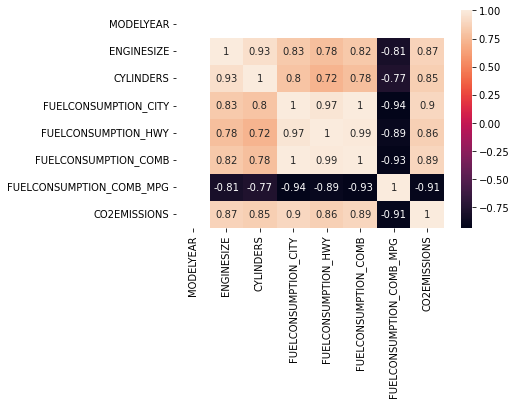

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [17]:
#lets select features that we want for regression
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [18]:
#Extracting Independent and dependent Variable
x= cdf.iloc[:, :-1].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9  6.7  8.5]
 [ 2.4  4.  11.2  7.7  9.6]
 [ 1.5  4.   6.   5.8  5.9]
 ...
 [ 3.   6.  13.4  9.8 11.8]
 [ 3.2  6.  12.9  9.3 11.3]
 [ 3.2  6.  14.9 10.2 12.8]]
[196 221 136 ... 271 260 294]


<AxesSubplot:>

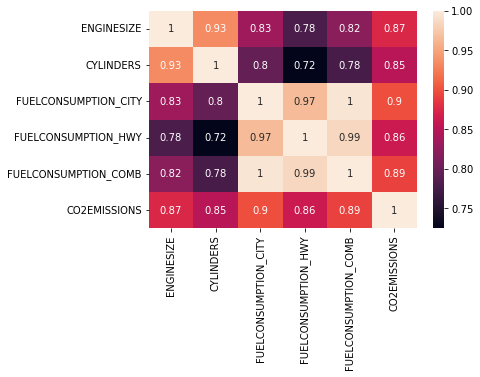

In [19]:
#check correlation between dependent and independent variable
import seaborn as sns
sns.heatmap(cdf.corr(),annot=True)

In [20]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [21]:
#fitting MLR to training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
#prediction
test_pred=regressor.predict(x_test)
train_pred=regressor.predict(x_train)

In [24]:
print(regressor.coef_)
print(regressor.intercept_)

[ 10.8547316    7.65914224 -11.21595269 -10.47231908  31.14100197]
64.88135054065853


In [25]:
print("Residual sum sqaures: %.2f" % np.mean((test_pred-y_test)**2))

Residual sum sqaures: 617.32


In [26]:
print(regressor.score(x_test, y_test))

0.8426468641660052


<AxesSubplot:>

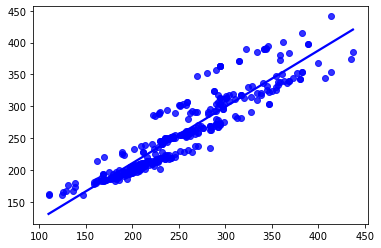

In [28]:
sns.regplot(x=y_test, y=test_pred, ci=None, color="b")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

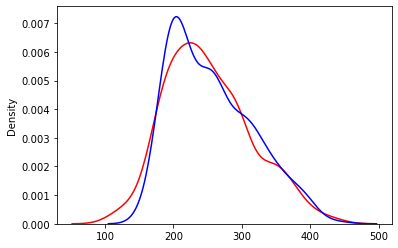

In [30]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(test_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [31]:
x= cdf.iloc[:, :3].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9]
 [ 2.4  4.  11.2]
 [ 1.5  4.   6. ]
 ...
 [ 3.   6.  13.4]
 [ 3.2  6.  12.9]
 [ 3.2  6.  14.9]]
[196 221 136 ... 271 260 294]


In [32]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [33]:
#Fitting the MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred= regressor.predict(x_test)

In [35]:
print(regressor.score(x_test, y_test))

0.8418565610806696
